# Walkthroughs and Exercises for GenAi-Powered Data Analysis in Python

Dr. Chester Ismay

# Data Analytics Kickoff + Course Goals

## Walkthrough #1: Setting Up the Python Environment

If you haven’t already installed Python, Jupyter, and the necessary
packages, there are instructions on the course repo in the README to do
so
[here](https://github.com/ismayc/oreilly-genai-powered-data-analysis-with-python/blob/main/README.md).

If you aren’t able to do this on your machine, you may want to check out
[Google Colab](https://colab.research.google.com/). It’s a free service
that allows you to run Jupyter notebooks in the cloud.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
# For plotly to load directly in Jupyter notebook
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

## Exercise #1: Setting Up the Python Environment

Follow the instructions above in Walkthrough #1 to check for correct
installation of necessary packages. We’ll wait a few minutes to make
sure as many of you are set up as possible. Please give a thumbs up in
the pulse check if you are ready to move on.

We’ll work with ChatGPT as our GenAI tool. If you are getting errors at
this point and would like to ask it for assistance, go for it! We’ll
make more use of it throughout the course, and I’ll give tips along the
way too.

------------------------------------------------------------------------

# *Day 1: Prompt to Wrangle*

------------------------------------------------------------------------

# Module 1: Data Wrangling with Pandas

## Walkthrough #2: Cleaning and Preparing Data with Pandas

### Import data from a CSV or from an Excel file

In [4]:
# Load the data from a CSV file
economies = pd.read_csv("economies.csv")

### Perform an initial exploration of the data

In [5]:
# Display the first few rows of the DataFrame
economies.head()

In [6]:
# Display the information about the DataFrame
economies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    int64  
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 48.3+ KB

In [7]:
# Display summary statistics of the DataFrame
economies.describe()

### Handle missing data

#### Remove rows

In [8]:
# Remove rows with any missing values
economies_cleaned_any = economies.dropna(how='any')
economies_cleaned_any

282 rows × 11 columns

In [9]:
# Remove rows with missing values in specific columns
economies_cleaned_subset = economies.dropna(subset=['exports', 'imports'])
economies_cleaned_subset

506 rows × 11 columns

#### Replace missing values with specific value

In [10]:
# Replace missing values with a specific value (e.g., 0 for numerical columns, 'Unknown' for categorical columns)
economies_fill_value = economies.fillna({
    'gdp_percapita': 0,
    'gross_savings': 0,
    'inflation_rate': 0,
    'total_investment': 0,
    'unemployment_rate': 0,
    'exports': 0,
    'imports': 0,
    'income_group': 'Unknown'
})

# Display the DataFrame after replacing missing values with specific values
economies_fill_value.head()

This can be extended to replace missing values with the mean, median, or
mode of the column too.

### Convert a column to a different data type

In [11]:
# Change year to be a string instead of an integer
economies_char_year = economies.astype({'year': 'str'})

# Display the information on the DataFrame with year as a string
economies_char_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    object 
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), object(4)
memory usage: 48.3+ KB

In [12]:
# Change the year of string type back to integer
economies_int_year = economies_char_year.astype({'year': 'int'})

# Display the information on the DataFrame with year as an integer
economies_int_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   code               561 non-null    object 
 1   country            561 non-null    object 
 2   year               561 non-null    int64  
 3   gdp_percapita      558 non-null    float64
 4   gross_savings      490 non-null    float64
 5   inflation_rate     555 non-null    float64
 6   total_investment   490 non-null    float64
 7   unemployment_rate  312 non-null    float64
 8   exports            509 non-null    float64
 9   imports            506 non-null    float64
 10  income_group       561 non-null    object 
dtypes: float64(7), int64(1), object(3)
memory usage: 48.3+ KB

### Rename a column

In [13]:
# Rename the 'income_group' column to 'income_category'
economies_renamed = economies.rename(columns={'income_group': 'income_category'})
economies_renamed.head()

### Filtering rows based on conditions

#### Conditions on a single column

In [14]:
# Filter rows where 'gdp_percapita' is greater than 20,000
economies[economies['gdp_percapita'] > 20000]

121 rows × 11 columns

In [15]:
# Filter rows where 'income_group' is 'High income'
economies[economies['income_group'] == 'High income']

180 rows × 11 columns

#### Conditions on multiple columns

In [16]:
# Filter rows where inflation_rate is less than 0 and income_group is 'Low income'
economies[(economies['inflation_rate'] < 0) & (economies['income_group'] == 'Low income')]

## Exercise #2: Cleaning and Preparing Data with Pandas

In [17]:
# Load the populations data from a CSV file
populations = pd.read_csv("populations.csv")

# Examine the first few rows
populations.head()

# Display the information about the DataFrame
populations.info()

# Display summary statistics of the DataFrame
populations.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country_code         645 non-null    object 
 1   country              645 non-null    object 
 2   year                 645 non-null    int64  
 3   fertility_rate       627 non-null    float64
 4   life_expectancy      623 non-null    float64
 5   size                 645 non-null    int64  
 6   official_state_name  645 non-null    object 
 7   sovereignty          645 non-null    object 
 8   continent            645 non-null    object 
 9   region               645 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 50.5+ KB

### Handle Missing Data

#### Remove rows

In [18]:
# Remove rows with any missing values
populations.dropna(how='any')

622 rows × 10 columns

In [19]:
# Remove rows with missing values in specific columns
populations.dropna(subset=['fertility_rate', 'life_expectancy'])

622 rows × 10 columns

#### Replace missing values with specific value

In [20]:
# Replace missing values with a specific value (e.g., 0 for numerical columns, 
# 'Unknown' for categorical columns)
populations_fill_value = populations.fillna({
    'fertility_rate': 0,
    'life_expectancy': 0,
    'size': 0,
    'continent': 'Unknown',
    'region': 'Unknown'
})
populations_fill_value

645 rows × 10 columns

### Convert a Column to a Different Data Type and Rename a Column

#### Convert a Column to a Different Data Type

In [21]:
# Convert the 'year' column to string type
populations['year'] = populations['year'].astype(str)
populations.dtypes

country_code            object
country                 object
year                    object
fertility_rate         float64
life_expectancy        float64
size                     int64
official_state_name     object
sovereignty             object
continent               object
region                  object
dtype: object

In [22]:
# Convert it back to integer
populations['year'] = populations['year'].astype(int)
populations.dtypes

country_code            object
country                 object
year                     int64
fertility_rate         float64
life_expectancy        float64
size                     int64
official_state_name     object
sovereignty             object
continent               object
region                  object
dtype: object

#### Rename a Column

In [23]:
# Rename the 'fertility_rate' column to 'fertility'
populations_renamed = populations.rename(columns={'fertility_rate': 'fertility'})
populations_renamed

645 rows × 10 columns

#### Filter a DataFrame

In [24]:
# Filter the DataFrame to include only rows where the 'continent' is 'Asia'
populations[populations['continent'] == 'Asia']

150 rows × 10 columns

In [25]:
# Filter the DataFrame to include only rows where the 'year' is 2020
populations[populations['year'] == 2020]

215 rows × 10 columns

In [26]:
# Filter the DataFrame to include only rows where the 'fertility_rate' is greater than 2
populations[populations['fertility_rate'] > 2]

366 rows × 10 columns

# Module 2: Transforming and Aggregating Data with Pandas

## Walkthrough #3: Summarizing Data with Pandas

### Grouping data

In [27]:
# Get the mean gdp per capita for each income_group
economies.groupby('income_group')['gdp_percapita'].mean()

income_group
High income            33781.737556
Low income               688.904493
Lower middle income     2329.609629
Not classified          7805.646667
Upper middle income     6679.059320
Name: gdp_percapita, dtype: float64

### Applying Functions

#### Applying a function element-wise with `map()`

In [28]:
# Convert income_group to uppercase using map()
economies_plus = economies.copy()
economies_plus['income_group_upper'] = economies['income_group'].map(str.upper)
economies_plus.head()

#### Applying a Function to Groups with `groupby()` and `agg()`

In [29]:
# Calculate the median gdp_percapita and inflation_rate for each income_group
economies.groupby('income_group').agg({
    'gdp_percapita': 'median',
    'inflation_rate': 'median'
})

### Summary tables

In [30]:
# Create a pivot table of gdp_percapita and inflation_rate by income_group and year
pd.pivot_table(
    economies,
    values=['gdp_percapita', 'inflation_rate'],
    index=['income_group'],
    columns=['year'],
    aggfunc='mean'
)

### Analyzing categorical data

#### Using cross-tabulation

In [31]:
# Show counts of income_group by year
pd.crosstab(economies['income_group'], economies['year'])

#### By getting group counts

In [32]:
# Count the occurrences of each income_group
economies['income_group'].value_counts()

income_group
High income            180
Lower middle income    159
Upper middle income    147
Low income              72
Not classified           3
Name: count, dtype: int64

## Exercise #3: Summarizing Data with Pandas

### Grouping Data

In [33]:
# Group data by continent and calculate the mean life expectancy
populations.groupby('continent')['life_expectancy'].mean()

continent
Africa           61.897980
Asia             73.611049
Europe           78.443978
North America    74.679029
Oceania          71.408114
South America    73.433389
Name: life_expectancy, dtype: float64

### Applying Functions

#### Applying a function element-wise with `map()`

In [34]:
# Convert continent to uppercase using map()
populations_plus = populations.copy()
populations_plus['continent_upper'] = populations['continent'].map(str.upper)
populations_plus.head()

#### Applying a function to groups with `groupby()` and `agg()`

In [35]:
# Calculate the median fertility rate and life expectancy for each continent
populations.groupby('continent').agg({
    'fertility_rate': 'median',
    'life_expectancy': 'median'
})

### Summary Tables

In [36]:
# Create a pivot table of fertility rate and life expectancy by continent and year
pd.pivot_table(
    populations,
    values=['fertility_rate', 'life_expectancy'],
    index=['continent'],
    columns=['year'],
    aggfunc='mean'
)

### Analyzing Categorical Data

#### Using Cross-Tabulation

In [37]:
# Create a cross-tabulation of continent and year
pd.crosstab(populations['continent'], populations['year'])

#### By Getting Group Counts

In [38]:
# Count the occurrences of each region
populations['region'].value_counts()

region
Caribbean                    66
Eastern Africa               54
Middle East                  54
Western Africa               48
Southern Europe              45
Southern and Central Asia    42
South America                36
Southeast Asia               33
Eastern Europe               30
Western Europe               27
Central Africa               27
Central America              24
Eastern Asia                 21
Micronesia                   21
Nordic Countries             18
Northern Africa              18
Polynesia                    15
Southern Africa              15
Melanesia                    15
North America                12
Baltic Countries              9
British Islands               9
Australia and New Zealand     6
Name: count, dtype: int64

------------------------------------------------------------------------

# Module 3: Exploring and Learning from Mistakes

Use the provided prompt (in `prompt.md` on GitHub) as your initial
guide. Here are 8 Python errors that you’ll attempt to use LLMs to help
you debug. Make sure to run the code in Jupyter first and then try to
debug!

## Walkthrough and Exercise #4: Debug with GenAI

In [60]:
### 1

populations.hed

AttributeError: 'DataFrame' object has no attribute 'hed'

In [61]:
### 2

populations.size.mean()

AttributeError: 'int' object has no attribute 'mean'

In [62]:
### 3

populations['Life_Expectancy'].mean()

KeyError: 'Life_Expectancy'

In [63]:
### 4

asia = populations[populations['continent'] = 'Asia']

SyntaxError: invalid syntax (3891326412.py, line 3)

In [64]:
### 5

populations[populations['continent'] == 'Asia' & populations['year'] == 2020]

TypeError: Cannot perform 'rand_' with a dtyped [int64] array and scalar of type [bool]

In [65]:
### 6

populations[populations['population_size'] > 1_000_000]

KeyError: 'population_size'

In [66]:
### 7

populations['double_size'] = populations['size'].apply(lambda x: x * 2, axis=1)

TypeError: <lambda>() got an unexpected keyword argument 'axis'

In [67]:
### 8

populations['fertility_rate'].fillna(0)

0      1.941
1      1.972
2      1.325
3      6.099
4      5.405
       ...  
640    4.793
641    4.379
642    4.025
643    3.849
644    3.545
Name: fertility_rate, Length: 645, dtype: float64

------------------------------------------------------------------------

# *Day 2: Visualize to Tell*

------------------------------------------------------------------------

# Module 4: Data Visualization Basics with Matplotlib and Seaborn

## Walkthrough #5: Data Visualization Techniques

### Line plot with Matplotlib

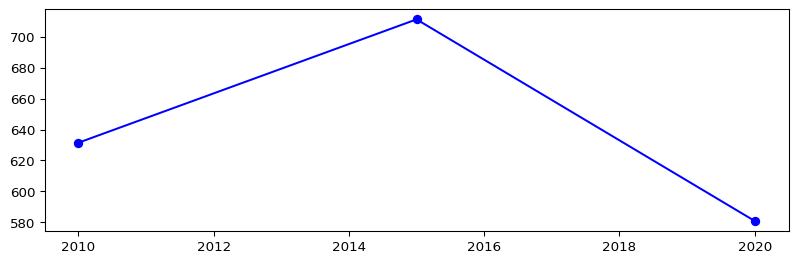

In [47]:
# Filter data for a specific country
afg_data = economies[economies['code'] == 'AFG']

# Line plot of gdp_percapita over the years
plt.figure(figsize=(10, 3));
plt.plot(afg_data['year'], afg_data['gdp_percapita'], 
         marker='o', linestyle='-', color='b');
plt.show();

### Bar chart with Matplotlib

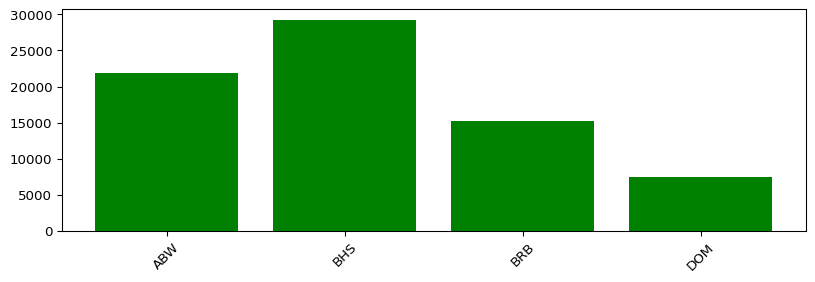

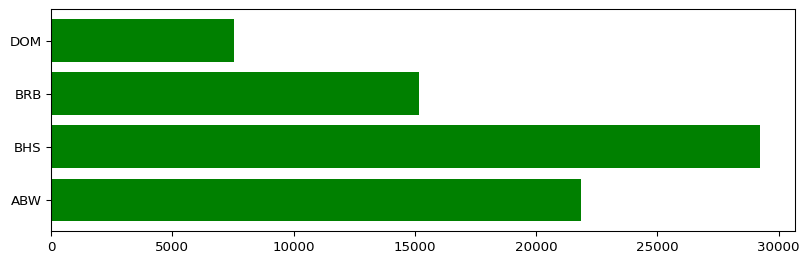

In [48]:
# Filter data for Caribbean countries and the year 2020
caribbean_countries = ['ABW', 'BHS', 'BRB', 'DOM']
data_2020_caribbean = economies[(economies['year'] == 2020) & (economies['code'].isin(caribbean_countries))]

# Bar chart of gdp_percapita for different Caribbean countries in 2020
plt.figure(figsize=(10, 3))
plt.bar(x=data_2020_caribbean['code'], 
        height=data_2020_caribbean['gdp_percapita'], 
        color='g')
plt.xticks(rotation=45);
plt.show();

# Horizontal version
plt.figure(figsize=(10, 3))
plt.barh(y=data_2020_caribbean['code'], 
         width=data_2020_caribbean['gdp_percapita'], 
         color='g')
plt.show();

### Adding labels and titles

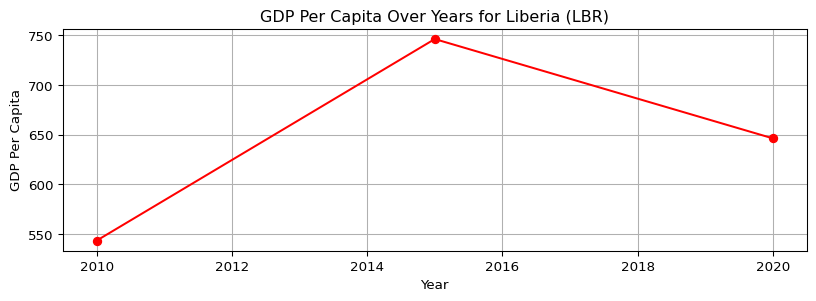

In [49]:
# Filter data for a specific country
liberia_data = economies[economies['code'] == 'LBR']

# Line plot of gdp_percapita over the years with labels and titles
plt.figure(figsize=(10, 3))
plt.plot(liberia_data['year'], liberia_data['gdp_percapita'], marker='o', linestyle='-', color='r');
plt.xlabel('Year');
plt.ylabel('GDP Per Capita');
plt.title('GDP Per Capita Over Years for Liberia (LBR)');
plt.grid(True);
plt.show();

### Adjusting axes and tick marks

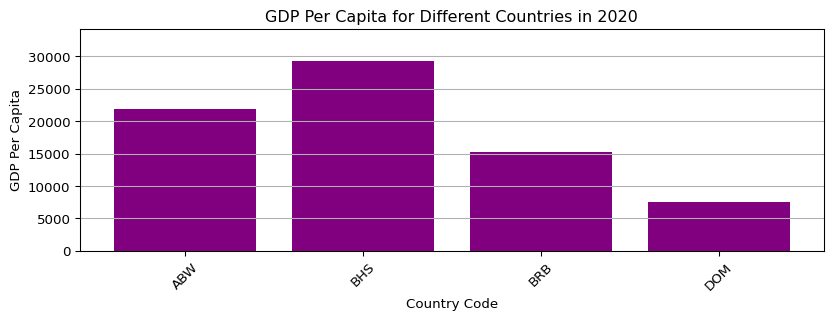

In [50]:
# Bar chart of gdp_percapita for different Caribbean countries in 2020 with 
# adjusted axes and tick marks
plt.figure(figsize=(10, 3))
plt.bar(data_2020_caribbean['code'], data_2020_caribbean['gdp_percapita'], color='purple')
plt.xlabel('Country Code')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita for Different Countries in 2020')

# Adjust axes
plt.ylim(0, max(data_2020_caribbean['gdp_percapita']) + 5000);

# Adjust tick marks
plt.xticks(rotation=45);
plt.yticks(range(0, int(max(data_2020_caribbean['gdp_percapita']) + 5000), 5000));

plt.grid(axis='y')
plt.show();

### Histogram with Seaborn

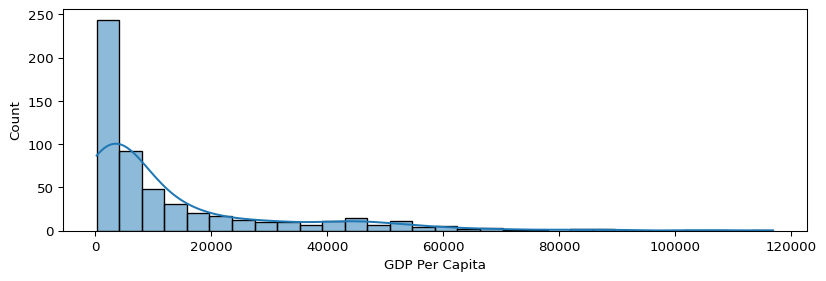

In [51]:
plt.figure(figsize=(10, 3))
sns.histplot(economies['gdp_percapita'], bins=30, kde=True)
plt.xlabel('GDP Per Capita')
plt.show();

### Boxplot with Seaborn

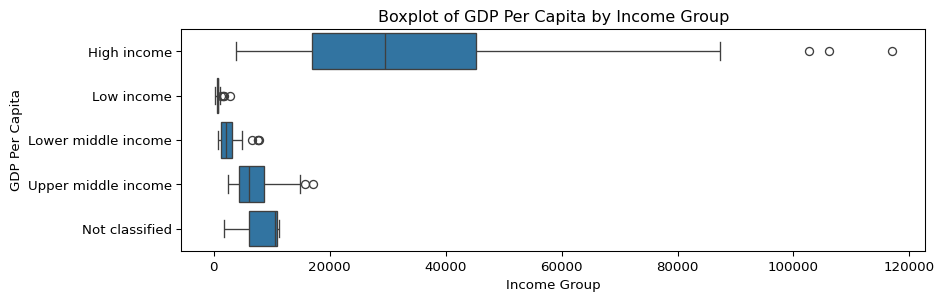

In [52]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='gdp_percapita', y='income_group', data=economies)
plt.xlabel('Income Group')
plt.ylabel('GDP Per Capita')
plt.title('Boxplot of GDP Per Capita by Income Group')
plt.show();

### Violin plot with Seaborn

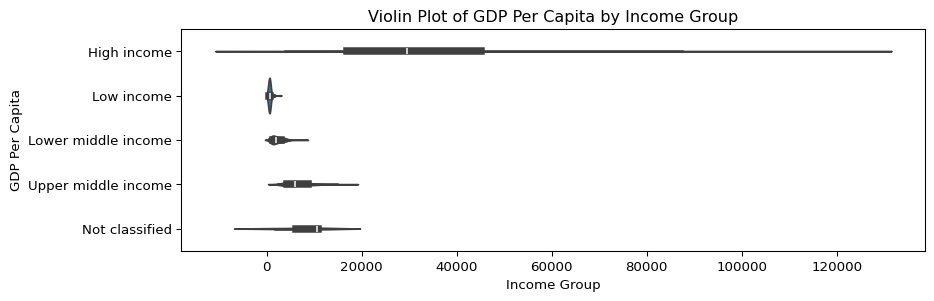

In [53]:
plt.figure(figsize=(10, 3))
sns.violinplot(x='gdp_percapita', y='income_group', data=economies)
plt.xlabel('Income Group')
plt.ylabel('GDP Per Capita')
plt.title('Violin Plot of GDP Per Capita by Income Group')
plt.show();

## Exercise #5: Data Visualization Techniques

### Line Plot with Matplotlib

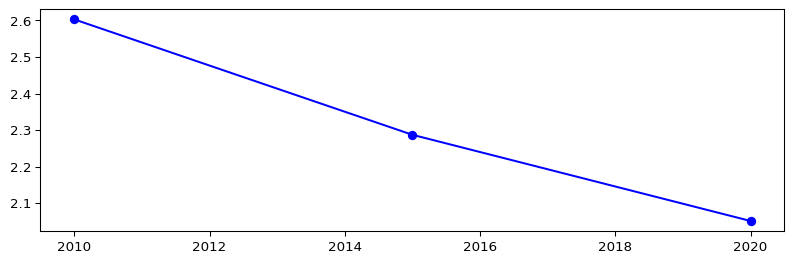

In [54]:
# Filter data for India
india_data = populations[populations['country_code'] == 'IND']

# Line plot of fertility rate over the years
plt.figure(figsize=(10, 3))
plt.plot(india_data['year'], india_data['fertility_rate'], marker='o', linestyle='-', color='b')
plt.show();

### Bar Chart with Matplotlib

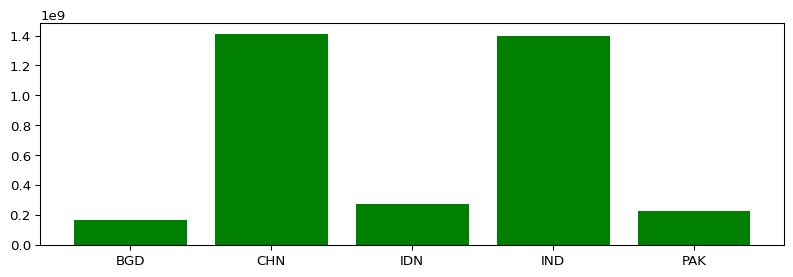

In [55]:
# Filter data for selected Asian countries and the year 2020
asian_countries = ['CHN', 'IND', 'IDN', 'PAK', 'BGD']
data_2020_asia = populations[(populations['year'] == 2020) & (populations['country_code'].isin(asian_countries))]

# Bar chart of population size for selected Asian countries in 2020
plt.figure(figsize=(10, 3))
plt.bar(data_2020_asia['country_code'], data_2020_asia['size'], color='g')
plt.show();

### Adding Labels and Titles

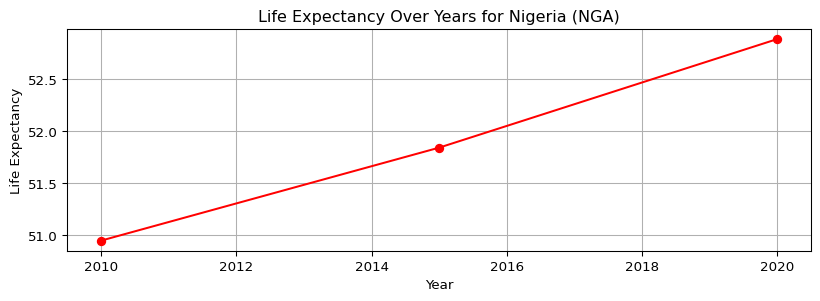

In [56]:
# Filter data for Nigeria
nigeria_data = populations[populations['country_code'] == 'NGA']

# Line plot of life expectancy over the years with labels and titles
plt.figure(figsize=(10, 3))
plt.plot(nigeria_data['year'], nigeria_data['life_expectancy'], 
         marker='o', linestyle='-', color='r')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy Over Years for Nigeria (NGA)')
plt.grid(True)
plt.show();

### Adjusting Axes and Tick Marks

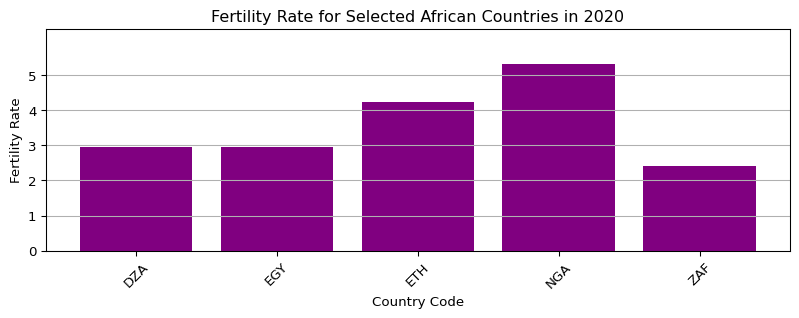

In [57]:
# Filter data for selected African countries ('NGA', 'ETH', 'EGY', 'ZAF', 'DZA')
# and the year 2020
african_countries = ['NGA', 'ETH', 'EGY', 'ZAF', 'DZA']

data_2020_africa = populations[(populations['year'] == 2020) & (populations['country_code'].isin(african_countries))]

# Bar chart of fertility rate for selected African countries in 2020 with 
# adjusted axes and tick marks
plt.figure(figsize=(10, 3))
plt.bar(data_2020_africa['country_code'], data_2020_africa['fertility_rate'], color='purple')
plt.xlabel('Country Code')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate for Selected African Countries in 2020')

# Adjust axes
plt.ylim(0, max(data_2020_africa['fertility_rate']) + 1);

# Adjust tick marks
plt.xticks(rotation=45);
plt.yticks(range(0, int(max(data_2020_africa['fertility_rate']) + 1), 1));

plt.grid(axis='y');
plt.show();

### Histogram with Seaborn

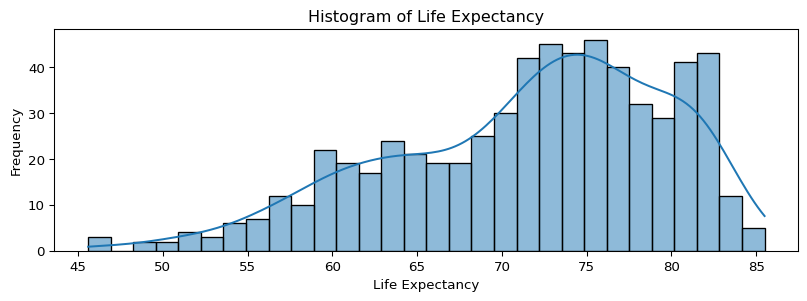

In [58]:
# Histogram of life expectancy
plt.figure(figsize=(10, 3))
sns.histplot(populations['life_expectancy'], bins=30, kde=True)
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.title('Histogram of Life Expectancy')
plt.show();

### Boxplot with Seaborn

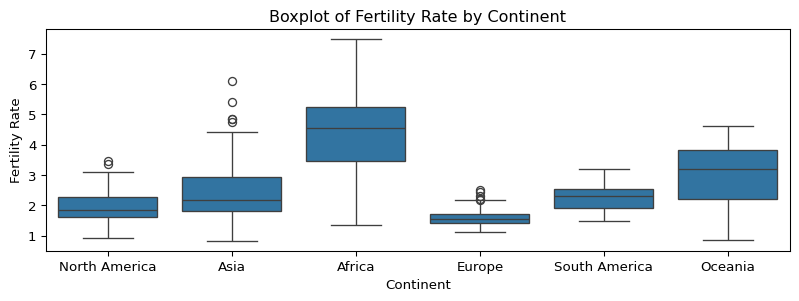

In [59]:
# Boxplot of fertility rate by continent
plt.figure(figsize=(10, 3))
sns.boxplot(x='continent', y='fertility_rate', data=populations)
plt.xlabel('Continent')
plt.ylabel('Fertility Rate')
plt.title('Boxplot of Fertility Rate by Continent')
plt.show();

### Violin Plot with Seaborn

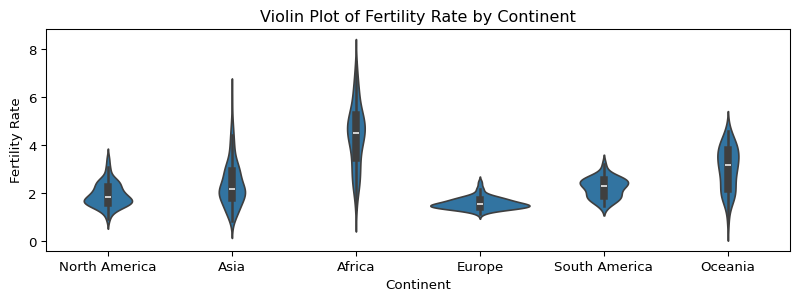

In [60]:
# Violin plot of fertility rate by continent
plt.figure(figsize=(10, 3))
sns.violinplot(x='continent', y='fertility_rate', data=populations)
plt.xlabel('Continent')
plt.ylabel('Fertility Rate')
plt.title('Violin Plot of Fertility Rate by Continent')
plt.show();

------------------------------------------------------------------------

# Module 5: Interactive Data Visualization with Plotly

## Walkthrough #6: Interactive Charts and Dashboards with Plotly

### Basic interactive chart

In [61]:
# Filter data for a specific country
afg_data = economies[economies['code'] == 'AFG']

# Create an interactive line chart
fig = px.line(afg_data, x='year', y='gdp_percapita', 
              title='GDP Per Capita Over Years for Afghanistan (AFG)')
fig.show()

### Adding interactive elements

In [62]:
# Create an interactive scatter plot
fig = px.scatter(economies, x='gdp_percapita', y='gross_savings', color='income_group',
                 hover_name='code', title='GDP Per Capita vs. Gross Savings',
                 labels={'gdp_percapita': 'GDP Per Capita', 'gross_savings': 'Gross Savings (%)'})

# Add hover, zoom, and selection tools
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'));
fig.update_layout(hovermode='closest');

fig.show()

### Designing a simple dashboard

In [63]:
# Filter data for the year 2020
data_2020 = economies[economies['year'] == 2020]

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('GDP Per Capita Over Years for Afghanistan', 
                                    'GDP Per Capita for Different Countries in 2020'))

# Line chart of GDP Per Capita for Afghanistan
afg_data = economies[economies['code'] == 'AFG']
line_chart = go.Scatter(x=afg_data['year'], y=afg_data['gdp_percapita'], 
                        mode='lines+markers', name='Afghanistan');
fig.add_trace(line_chart, row=1, col=1);

# Bar chart of GDP Per Capita for different countries in 2020
bar_chart = go.Bar(x=data_2020['code'], y=data_2020['gdp_percapita'], name='2020')
fig.add_trace(bar_chart, row=1, col=2);

# Update layout
fig.update_layout(title_text='Simple Dashboard with Multiple Charts',
                  showlegend=False, width=830, height=500);

fig.show()

## Exercise #6: Interactive Charts and Dashboards with Plotly

### Basic Interactive Chart

In [64]:
# Filter data for a specific country (Brazil)
bra_data = populations[populations['country_code'] == 'BRA']

# Create an interactive line chart (Fertility Rate Over Years)
fig = px.line(bra_data, x='year', y='fertility_rate', 
              title='Fertility Rate Over Years for Brazil (BRA)')
fig.show()

### Adding Interactive Elements

In [65]:
# Create an interactive scatter plot
fig = px.scatter(
  populations, 
  x='fertility_rate', y='life_expectancy', color='continent',
  hover_name='country', title='Fertility Rate vs. Life Expectancy',
  labels={'fertility_rate': 'Fertility Rate', 'life_expectancy': 'Life Expectancy'}
)

# Add hover, zoom, and selection tools
fig.update_traces(marker=dict(size=10), selector=dict(mode='markers'));
fig.update_layout(hovermode='closest');

fig.show()

### Designing a Simple Dashboard

In [66]:
# Filter data for the year 2020
data_2020 = populations[populations['year'] == 2020]

# Create a subplot figure with 1 row and 2 columns
fig = make_subplots(
  rows=1, cols=2, 
  subplot_titles=('Life Expectancy Over Years for Brazil', 
                  'Life Expectancy for Different Countries in 2020'));

# Line chart of Life Expectancy for Brazil
bra_data = populations[populations['country_code'] == 'BRA']
line_chart = go.Scatter(x=bra_data['year'], y=bra_data['life_expectancy'], 
                        mode='lines+markers', name='Brazil')
fig.add_trace(line_chart, row=1, col=1);

# Bar chart of Life Expectancy for South American countries in 2020
south_american_data_2020 = data_2020[data_2020['continent'] == 'South America']
bar_chart = go.Bar(x=south_american_data_2020['country'], 
                   y=south_american_data_2020['life_expectancy'], name='2020')
fig.add_trace(bar_chart, row=1, col=2);

# Update layout to add a title and hide the legend
fig.update_layout(title_text='Simple Dashboard with Multiple Charts', 
                  showlegend=False);
fig.show()